In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [52]:
# to substitute by the imputed data
f = pd.read_csv('../../data/full_reencoded.csv', sep='\t', index_col=0)

In [53]:
f.shape

(1282, 13)

In [54]:
f.groupby('commensal').size()

commensal
0    912
1    370
dtype: int64

In [55]:
f.head(2)

,commensal,date_after2010,age_more60,female,pe_urinaire,pe_digestive,ceremi,coliville,LBC,PAR,ROAR,septicoli,colibafi
code_rangement,,,,,,,,,,,,,
H1-001-0001-M-L,0,1,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0
H1-001-0002-H-K,0,1,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0


In [56]:
phenotypes = ['commensal', 'female', 'pe_urinaire', 'pe_digestive', 'age_more60', 'date_after2010']

In [57]:
dpheno = {'commensal': 'Commensal isolate',
         'female': 'Female donor',
         'pe_urinaire': 'Clinical isolate with urinary tract as portal of entry',
         'pe_digestive': 'Clinical isolate with digestive tract as portal of entry',
         'age_more60': 'More than 60y donor',
         'date_after2010': 'Collected after 2010'}

In [58]:
res = []
for p in phenotypes:
    res.append((dpheno[p],
               f[f[p] == 1].shape[0], f[f[p] == 0].shape[0]))
r = pd.DataFrame(res,
                columns=['phenotype', 'present', 'absent'])

In [59]:
r['prevalence'] = r['present'] / (r['present'] + r['absent'])

In [60]:
r

,phenotype,present,absent,prevalence
0,Commensal isolate,370,912,0.288612
1,Female donor,649,573,0.531097
2,Clinical isolate with urinary tract as portal ...,499,729,0.406352
3,Clinical isolate with digestive tract as porta...,310,895,0.257261
4,More than 60y donor,712,543,0.567331
5,Collected after 2010,811,471,0.632605


In [61]:
r = r.melt(id_vars='phenotype')

In [62]:
r = r[r['variable'] == 'prevalence']

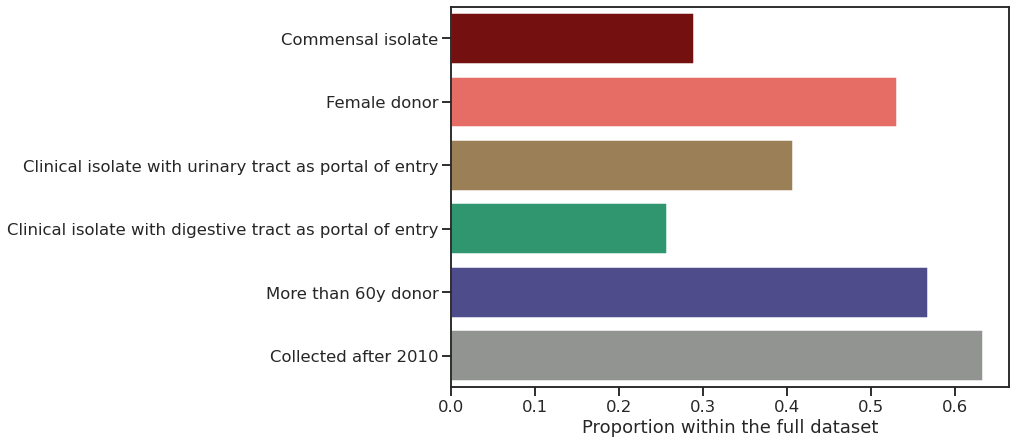

In [63]:
plt.figure(figsize=(10, 7))

sns.barplot(data=r,
            y='phenotype',
            x='value',
            palette=['#840000', '#fc5a50', 'xkcd:coffee',
                     '#1fa774', '#464196', '#929591'])

plt.xlabel('Proportion within the full dataset')
plt.ylabel('')

plt.savefig('../../out/figures/phenotypes.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/phenotypes.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [64]:
f.head(2)

,commensal,date_after2010,age_more60,female,pe_urinaire,pe_digestive,ceremi,coliville,LBC,PAR,ROAR,septicoli,colibafi
code_rangement,,,,,,,,,,,,,
H1-001-0001-M-L,0,1,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0
H1-001-0002-H-K,0,1,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0


In [65]:
collections = ['ceremi', 'coliville', 'LBC', 'PAR', 'ROAR', 'septicoli', 'colibafi']

In [66]:
res_c = []
for c in collections:
    res_c.append((c,
               f[f[c] == 1].shape[0], f[f[c] == 0].shape[0]))
rc = pd.DataFrame(res_c,
                columns=['collection', 'present', 'absent'])

In [67]:
rc['prevalence'] = rc['present'] / (rc['present'] + rc['absent'])

In [68]:
rc = rc.melt(id_vars='collection')

In [69]:
rc = rc[rc['variable'] == 'prevalence']

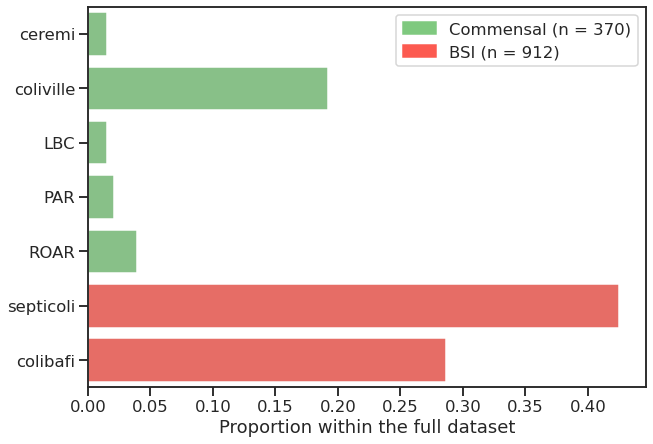

In [70]:
plt.figure(figsize=(10, 7))

sns.barplot(data=rc,
            y='collection',
            x='value',
            palette=5*['#7fc97f'] + 2*['xkcd:coral'])

colors = {'Commensal (n = 370)':'#7fc97f', 'BSI (n = 912)':'xkcd:coral'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, facecolor='w')

plt.xlabel('Proportion within the full dataset')
plt.ylabel('')

plt.savefig('../../out/figures/collections_distribution.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/collections_distribution.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [71]:
s = f[['commensal', 'female', 'pe_urinaire', 'pe_digestive', 'age_more60', 'date_after2010']]

In [72]:
s = (s.groupby('commensal').sum() / s.groupby('commensal').count()).reset_index()
s = s.melt(id_vars='commensal')

In [73]:
s['isolate'] = ['commensal' if x == 1
               else 'pathogenic'
               for x in s['commensal'].values]

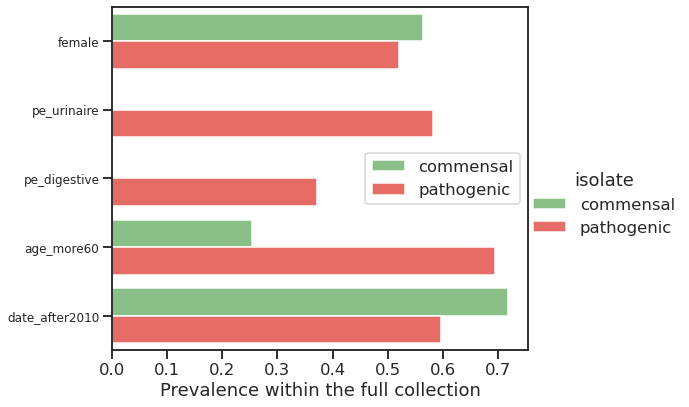

In [74]:
sns.catplot(data=s[s['variable'] != 'age'],
            kind='bar',
            x='value',
            y='variable',
            hue='isolate',
            height=6,
            aspect=1.5,
            #order=order_alt,
            hue_order=['commensal', 'pathogenic'],
            palette=['#7fc97f', 'xkcd:coral'])
plt.legend(facecolor='w')
plt.ylabel('')
plt.xlabel('Prevalence within the full collection')
plt.yticks(size=12)
# plt.title('Imputed data')

sns.despine(top=False, right=False)

#plt.savefig('data_imputed.png',
#            dpi=300,
#            bbox_inches='tight',
#            transparent=True)
#plt.savefig('data_imputed.svg',
#            dpi=300, bbox_inches='tight',
#            transparent=True);

In [75]:
s = f[['commensal', 'female', 'pe_urinaire', 'pe_digestive', 'age_more60', 'date_after2010']]

In [76]:
s = (s.groupby('commensal').sum() / s.groupby('commensal').count()).reset_index()
s = s.melt(id_vars='commensal')

In [77]:
s['isolate'] = ['commensal' if x == 1
               else 'pathogenic'
               for x in s['commensal'].values]

In [78]:
s

,commensal,variable,value,isolate
0,0,female,0.519737,pathogenic
1,1,female,0.564516,commensal
2,0,pe_urinaire,0.581585,pathogenic
3,1,pe_urinaire,0.000000,commensal
4,0,pe_digestive,0.371257,pathogenic
5,1,pe_digestive,0.000000,commensal
6,0,age_more60,0.694289,pathogenic
7,1,age_more60,0.254144,commensal
8,0,date_after2010,0.597588,pathogenic
9,1,date_after2010,0.718919,commensal


In [79]:
s1 = s.pivot_table(columns='isolate', index='variable', values='value')

In [80]:
s1

isolate,commensal,pathogenic
variable,,
age_more60,0.254144,0.694289
date_after2010,0.718919,0.597588
female,0.564516,0.519737
pe_digestive,0.000000,0.371257
pe_urinaire,0.000000,0.581585


No handles with labels found to put in legend.


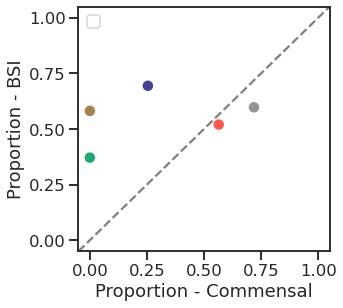

In [81]:
plt.figure(figsize=(4.5, 4.5))

colors = ['xkcd:coffee', '#1fa774', '#fc5a50'] + ['#929591'] + ['#464196']

plt.scatter(s1['commensal'],
            s1['pathogenic'],
            c=colors[::-1])
#,
#            label='>60y')

plt.legend(facecolor='w')

plt.plot([-0.05, 1.05], [-0.05, 1.05],
         '--', color='grey',
         zorder=0)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.xticks([0, .25, .5, .75, 1.])
plt.yticks([0, .25, .5, .75, 1.])

plt.xlabel('Proportion - Commensal')
plt.ylabel('Proportion - BSI')

plt.savefig('../../out/figures/prevalence_compare.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/prevalence_compare.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [82]:
# just covariates used
s1.drop(s1.tail(2).index, inplace=True)

In [83]:
s1

isolate,commensal,pathogenic
variable,,
age_more60,0.254144,0.694289
date_after2010,0.718919,0.597588
female,0.564516,0.519737


No handles with labels found to put in legend.


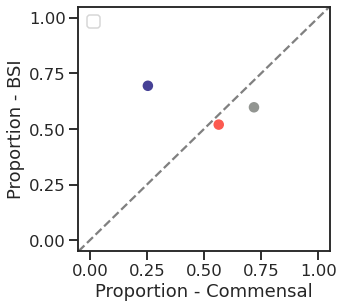

In [84]:
plt.figure(figsize=(4.5, 4.5))

colors = ['#fc5a50'] + ['#929591'] + ['#464196']

plt.scatter(s1['commensal'],
            s1['pathogenic'],
            c=colors[::-1])
#,
#            label='>60y')

plt.legend(facecolor='w')

plt.plot([-0.05, 1.05], [-0.05, 1.05],
         '--', color='grey',
         zorder=0)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.xticks([0, .25, .5, .75, 1.])
plt.yticks([0, .25, .5, .75, 1.])

plt.xlabel('Proportion - Commensal')
plt.ylabel('Proportion - BSI')

plt.savefig('../../out/figures/prevalence_covariates_compare.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/prevalence_covariates_compare.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

______

In [26]:
# heritability

In [27]:
h = pd.read_csv('../../out/associations/heritability.tsv', sep='\t')
hl = pd.read_csv('../../out/associations/heritability_lineages.tsv', sep='\t')
h_peu = pd.read_csv('../../out/peu/heritability.tsv', sep='\t')
hl_peu = pd.read_csv('../../out/peu/heritability_lineages.tsv', sep='\t')
h_ped = pd.read_csv('../../out/ped/heritability.tsv', sep='\t')
hl_ped = pd.read_csv('../../out/ped/heritability_lineages.tsv', sep='\t')
h_b2 = pd.read_csv('../../out/b2/heritability.tsv', sep='\t')
hl_b2 = pd.read_csv('../../out/b2/heritability_lineages.tsv', sep='\t')

In [28]:
h['type'] = ['genetic variants' if x != 0
            else 0
            for x in h['h2']]
hl['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hl['h2']]
h_peu['type'] = ['genetic variants' if x != 0
            else 0
            for x in h_peu['h2']]
hl_peu['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hl_peu['h2']]
h_ped['type'] = ['genetic variants' if x != 0
            else 0
            for x in h_ped['h2']]
hl_ped['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hl_ped['h2']]
h_b2['type'] = ['genetic variants' if x != 0
            else 0
            for x in h_b2['h2']]
hl_b2['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hl_b2['h2']]

In [29]:
hh = pd.concat([h, hl])
hh_peu = pd.concat([h_peu, hl_peu])
hh_ped = pd.concat([h_ped, hl_ped])
hh_b2 = pd.concat([h_b2, hl_b2])

In [30]:
hh.rename(columns={'h2':'naïve', 'h2_covariates':'+ covariates'}, inplace=True)
hh_peu.rename(columns={'h2':'naïve', 'h2_covariates':'+ covariates'}, inplace=True)
hh_ped.rename(columns={'h2':'naïve', 'h2_covariates':'+ covariates'}, inplace=True)
hh_b2.rename(columns={'h2':'naïve', 'h2_covariates':'+ covariates'}, inplace=True)

In [31]:
hh = pd.melt(hh, id_vars=['type'], value_vars=['naïve', '+ covariates'])
hh_peu = pd.melt(hh_peu, id_vars=['type'], value_vars=['naïve', '+ covariates'])
hh_ped = pd.melt(hh_ped, id_vars=['type'], value_vars=['naïve', '+ covariates'])
hh_b2 = pd.melt(hh_b2, id_vars=['type'], value_vars=['naïve', '+ covariates'])

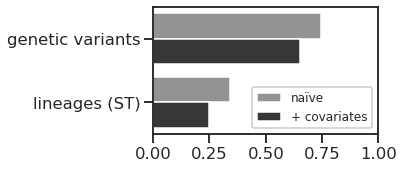

In [32]:
cp = sns.catplot(data=hh,
                 dodge=True,
                 legend=False,
                 height=3,
                 aspect=2,
                 kind='bar',
                 x='value', y='type',
                 hue = 'variable',
                 palette=['xkcd:grey', 'xkcd:dark grey'])

legend = plt.legend(loc='lower right', prop={'size': 11})
cp.set_xlabels('')
cp.set_ylabels('')
cp.set(xlim=(0, 1))
sns.despine(top=False,
            right=False)
legend = plt.legend(loc='lower right', prop={'size':12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.savefig('../../out/figures/h2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/h2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

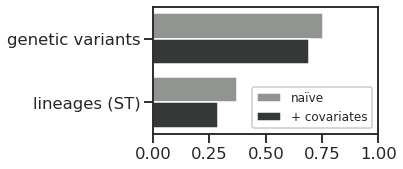

In [33]:
cp = sns.catplot(data=hh_peu,
                 dodge=True,
                 legend=False,
                 height=3,
                 aspect=2,
                 kind='bar',
                 x='value', y='type',
                 hue = 'variable',
                 palette=['xkcd:grey', 'xkcd:dark grey'])

legend = plt.legend(loc='lower right', prop={'size': 11})
cp.set_xlabels('')
cp.set_ylabels('')
cp.set(xlim=(0, 1))
sns.despine(top=False,
            right=False)
legend = plt.legend(loc='lower right', prop={'size':12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))

plt.savefig('../../out/figures/h2_peu.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/h2_peu.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

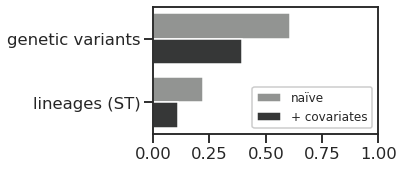

In [34]:
cp = sns.catplot(data=hh_ped,
                 dodge=True,
                 legend=False,
                 height=3,
                 aspect=2,
                 kind='bar',
                 x='value', y='type',
                 hue = 'variable',
                 palette=['xkcd:grey', 'xkcd:dark grey'])

legend = plt.legend(loc='lower right', prop={'size': 11})
cp.set_xlabels('')
cp.set_ylabels('')
cp.set(xlim=(0, 1))
sns.despine(top=False,
            right=False)
legend = plt.legend(loc='lower right', prop={'size':12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))

plt.savefig('../../out/figures/h2_ped.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/h2_ped.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [35]:
hh['set'] = ['Full collection' if x != 0
            else 'n'
            for x in hh['value']]
hh_peu['set'] = ['PE: Urinary' if x != 0
                else 'n'
                for x in hh_peu['value']]
hh_ped['set'] = ['PE: Digestive' if x != 0
                else 'n'
                for x in hh_ped['value']]

In [36]:
he = pd.concat([hh, hh_peu, hh_ped])

In [37]:
he

,type,variable,value,set
0,genetic variants,naïve,0.745810,Full collection
1,lineages (ST),naïve,0.339630,Full collection
2,genetic variants,+ covariates,0.650887,Full collection
3,lineages (ST),+ covariates,0.247926,Full collection
0,genetic variants,naïve,0.755549,PE: Urinary
1,lineages (ST),naïve,0.373042,PE: Urinary
2,genetic variants,+ covariates,0.690308,PE: Urinary
3,lineages (ST),+ covariates,0.287221,PE: Urinary
0,genetic variants,naïve,0.608590,PE: Digestive
1,lineages (ST),naïve,0.219180,PE: Digestive


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


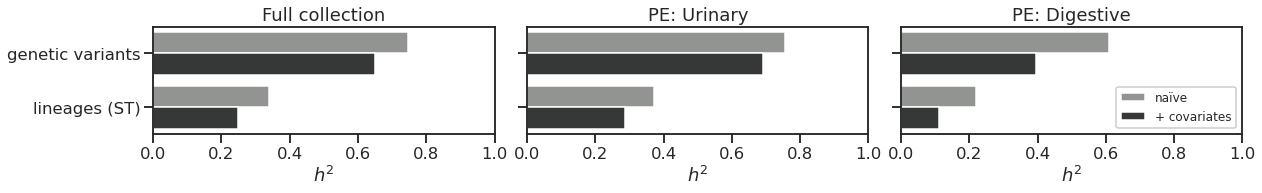

In [38]:
cp = sns.catplot(data=he,
                 dodge=True,
                 legend=False,
                 height=3,
                 aspect=2,
                 kind='bar',
                 x='value', y='type',
                 hue = 'variable',
                 col= 'set',
                 palette=['xkcd:grey', 'xkcd:dark grey'])

legend = plt.legend(loc='lower right', prop={'size': 11})
cp.set_xlabels('$h^2$')
cp.set_ylabels('')
cp.set(xlim=(0, 1))
cp.set_titles(col_template='{col_name}')
sns.despine(top=False,
            right=False)
legend = plt.legend(loc='lower right', prop={'size':12})
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))

plt.savefig('../../out/figures/h2.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/h2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [39]:
h = pd.read_csv('../../out/associations/heritability_/heritability.tsv', sep='\t')
hl = pd.read_csv('../../out/associations/heritability_/heritability_lineages.tsv', sep='\t')
ha = pd.read_csv('../../out/associations/heritability_/heritability_age.tsv', sep='\t')
hla = pd.read_csv('../../out/associations/heritability_/heritability_age_lineages.tsv', sep='\t')
hs = pd.read_csv('../../out/associations/heritability_/heritability_sex.tsv', sep='\t')
hls = pd.read_csv('../../out/associations/heritability_/heritability_sex_lineages.tsv', sep='\t')
hd = pd.read_csv('../../out/associations/heritability_/heritability_date.tsv', sep='\t')
hld = pd.read_csv('../../out/associations/heritability_/heritability_date_lineages.tsv', sep='\t')

In [40]:
h['type'] = ['genetic variants' if x != 0
            else 0
            for x in h['h2']]
hl['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hl['h2']]
ha['type'] = ['genetic variants' if x != 0
            else 0
            for x in ha['h2']]
hla['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hla['h2']]
hs['type'] = ['genetic variants' if x != 0
            else 0
            for x in hs['h2']]
hls['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hls['h2']]
hd['type'] = ['genetic variants' if x != 0
            else 0
            for x in hd['h2']]
hld['type'] = ['lineages (ST)' if x !=0
             else 0
             for x in hld['h2']]

In [41]:
hh = pd.concat([h, hl])
hha = pd.concat([ha, hla])
hhs = pd.concat([hs, hls])
hhd = pd.concat([hd, hld])

In [42]:
hh['covariates'] = ['all' if x != 0
                   else 0
                   for x in hh['h2']]
hha['covariates'] = ['age' if x != 0
                   else 0
                   for x in hha['h2']]
hhs['covariates'] = ['sex' if x != 0
                   else 0
                   for x in hhs['h2']]
hhd['covariates'] = ['date' if x != 0
                   else 0
                   for x in hhd['h2']]

In [43]:
hhh = pd.concat([hh, hha, hhs, hhd])

In [44]:
hhh

,phenotype,lik,h2,h2_covariates,type,covariates
0,commensal,normal,0.74581,0.650887,genetic variants,all
0,commensal,normal,0.33963,0.247926,lineages (ST),all
0,commensal,normal,0.74581,0.639531,genetic variants,age
0,commensal,normal,0.33963,0.253656,lineages (ST),age
0,commensal,normal,0.74581,0.738020,genetic variants,sex
0,commensal,normal,0.33963,0.332080,lineages (ST),sex
0,commensal,normal,0.74581,0.764743,genetic variants,date
0,commensal,normal,0.33963,0.348534,lineages (ST),date


In [45]:
f = hhh[['h2_covariates', 'type', 'covariates']]
f.rename(columns={'h2_covariates':'value'}, inplace=True)

/home/burgaya/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [46]:
n = hhh[['h2', 'type', 'covariates']]
n['covariates'] = ['naïve' if x != 0
                  else 0
                  for x in n['h2']]
n.reset_index(inplace=True)
n.drop([2, 3, 4, 5, 6, 7], inplace=True)

/tmp/ipykernel_53916/4229055794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n['covariates'] = ['naïve' if x != 0
/home/burgaya/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
n.drop(columns='index', inplace=True)

In [48]:
n.rename(columns={'h2':'value'}, inplace=True)

In [49]:
ff = pd.concat([f, n])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


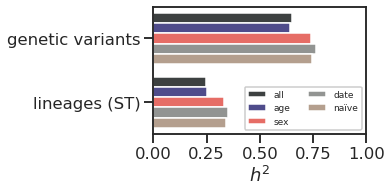

In [50]:
cp = sns.catplot(data=ff,
                 dodge=True,
                 legend=False,
                 height=3,
                 aspect=2,
                 kind='bar',
                 x='value', y='type',
                 hue = 'covariates',
                 palette=['xkcd:charcoal grey', '#464196', '#fc5a50', 
                          '#929591', 'xkcd:mushroom'])

legend = plt.legend(loc='lower right', prop={'size': 11})
cp.set_xlabels('')
cp.set_ylabels('')
cp.set(xlim=(0, 1))
sns.despine(top=False,
            right=False)
cp.set_xlabels('$h^2$')

legend = plt.legend(loc='lower right', prop={'size':9}, ncol=2)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))


plt.savefig('../../out/figures/h2_covariates.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/h2_covariates.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);